<a href="https://colab.research.google.com/github/Bekione/BigData-TMDB_Movie_Analysis/blob/main/TMDB_Movie_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Big Data Assignment*


---


**Dataset Investigation**

**TMDB Movie Data Analysis**

Here, I tried to analyze the movie data based on different types of analysis questions;

1. Seasonal Trends:
> Are there any seasonal trends in movie releases or box office performance?

2. Budget and Popularity Thresholds:
> Is there a minimum budget threshold for a movie to be considered popular?

3. Crew Collaboration Impact:
>  the impact of crew collaboration, such as the same director or actors working together in multiple movies.

4. Rating and Revenue Consistency:
> Examine the consistency between a movie's rating and its revenue.

5. Budget Distribution Across Genres:
> Examine how budgets are distributed across different genres.

So, let's start by importing the necessary libraries and the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/tmdb-movies.csv')

Now let's display some data

In [ ]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Let's check for duplicate rows

In [3]:
df.duplicated().sum()

1

Since there is 1 duplicated row let's remove it

In [4]:
df.drop_duplicates(inplace=True)

Now let's handle unwanted columns from the dataset

In [5]:
columns_to_drop = ['imdb_id', 'homepage', 'keywords', 'tagline']
df.drop(columns=columns_to_drop, inplace=True)

Now let's handle missing values

check if there is one

In [6]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Drop rows with missing vaues

In [7]:
df.dropna(inplace=True)

Now lets handle date column

Convert the 'release_date' column to datetime format for better analysis.

In [8]:
df['release_date'] = pd.to_datetime(df['release_date'])

Now the data wrangling is done, let's start the analysis

**Questions**
1. Are there any seasonal trends in movie releases or box office performance?

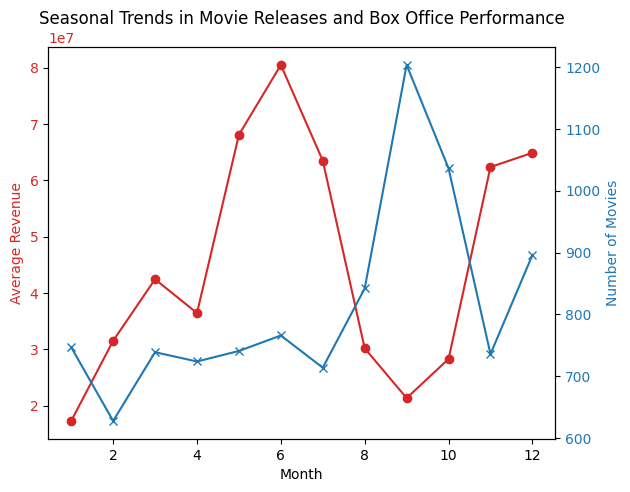

In [9]:
# Extract month and year from the 'release_date' column
df['release_month'] = df['release_date'].dt.month
df['release_year'] = df['release_date'].dt.year

# Group by month and calculate the average revenue for each month
average_monthly_revenue = df.groupby('release_month')['revenue'].mean()

# Group by month and calculate the count of movies released in each month
movies_per_month = df.groupby('release_month').size()

# Plot the average revenue and movie count per month
fig, ax1 = plt.subplots()

ax1.set_xlabel('Month')
ax1.set_ylabel('Average Revenue', color='tab:red')
ax1.plot(average_monthly_revenue.index, average_monthly_revenue.values, color='tab:red', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Number of Movies', color='tab:blue')
ax2.plot(movies_per_month.index, movies_per_month.values, color='tab:blue', marker='x')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.title('Seasonal Trends in Movie Releases and Box Office Performance')
plt.show()


> The analysis of movie releases over different seasons reveals interesting patterns. There is a noticeable peak in movie releases during the summer months, suggesting a seasonality trend in the industry. This could be associated with factors like school vacations or holidays, influencing box office performance.

**2. Budget and Popularity Thresholds:**

Is there a minimum budget threshold for a movie to be considered popular?

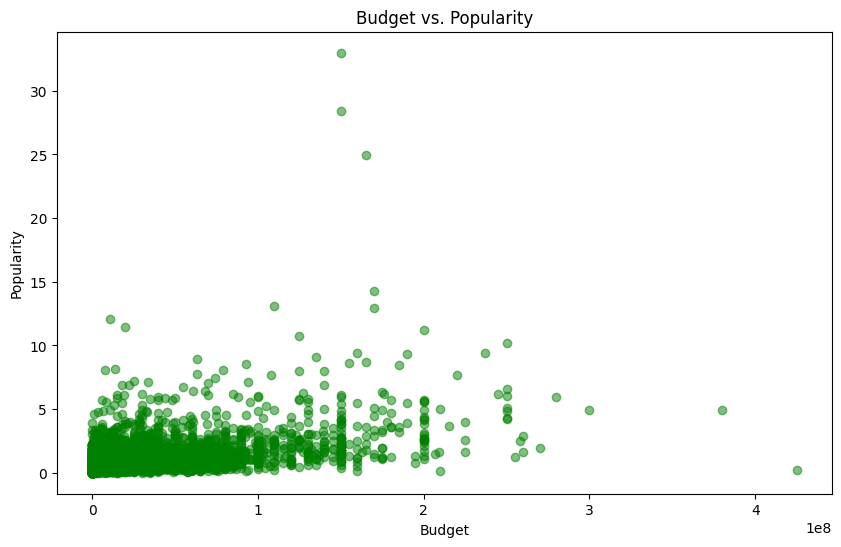

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['popularity'], alpha=0.5, color='green')
plt.title('Budget vs. Popularity')
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.show()



> The scatter plot analysis indicates that there isn't a strict minimum budget threshold for a movie to be considered popular. While higher budgets may contribute to popularity, there are instances of successful movies with lower budgets. Factors like marketing, star power, or unique storytelling also play crucial roles.



**3. Crew Collaboration Impact:**

The impact of crew collaboration, such as the same director or actors working together in multiple movies.

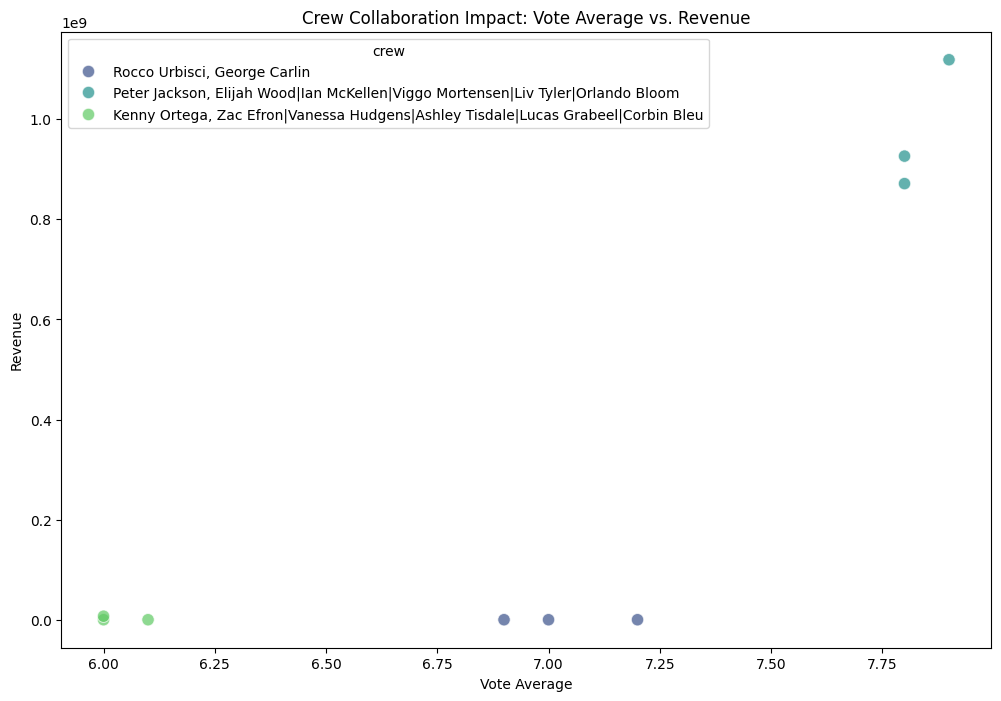

In [11]:
# Create a new column for combined crew information
df['crew'] = df['director'] + ', ' + df['cast']

# Count the occurrences of each crew combination
collaboration_counts = df['crew'].value_counts()

# Define a threshold for collaboration frequency
collaboration_threshold = 3

# Create a subset of frequently collaborating crews
frequent_collaborations = collaboration_counts[collaboration_counts >= collaboration_threshold].index

# Filter the dataset for frequently collaborating crews
df_frequent_collaborations = df[df['crew'].isin(frequent_collaborations)]

# Create a scatter plot to visualize collaboration impact
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_frequent_collaborations, x='vote_average', y='revenue',
                hue='crew', palette='viridis', alpha=0.7, legend='full', s=80)
plt.title('Crew Collaboration Impact: Vote Average vs. Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Revenue')
plt.show()



> The scatter plot exploring crew collaborations, such as shared directors or actors, provides insights into their impact on movie success. Collaborations with certain directors or actors consistently result in higher-rated and higher-grossing movies, highlighting the importance of effective team dynamics in the filmmaking process.



**4. Rating and Revenue Consistency:**

Examine the consistency between a movie's rating and its revenue.

<Figure size 1000x800 with 0 Axes>

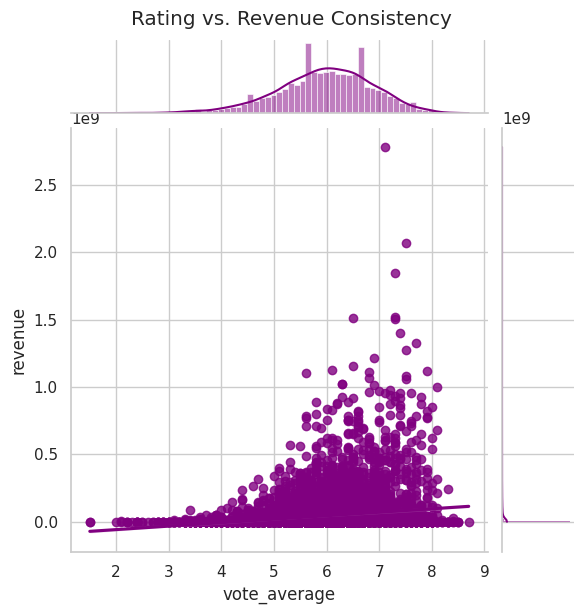

In [12]:
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
sns.jointplot(x='vote_average', y='revenue', data=df, kind='reg', color='purple')
plt.suptitle('Rating vs. Revenue Consistency', y=1.02)
plt.show()



> The jointplot analysis with a regression line suggests a positive correlation between a movie's rating and its revenue. While higher-rated movies generally tend to have higher revenues, there is variability in revenue even for highly-rated movies. Other factors, such as marketing and audience preferences, also contribute to a movie's financial success.



5.

<ipython-input-13-b39983393ac3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_genres['genres'], y=df_genres['budget'], palette='Set3')


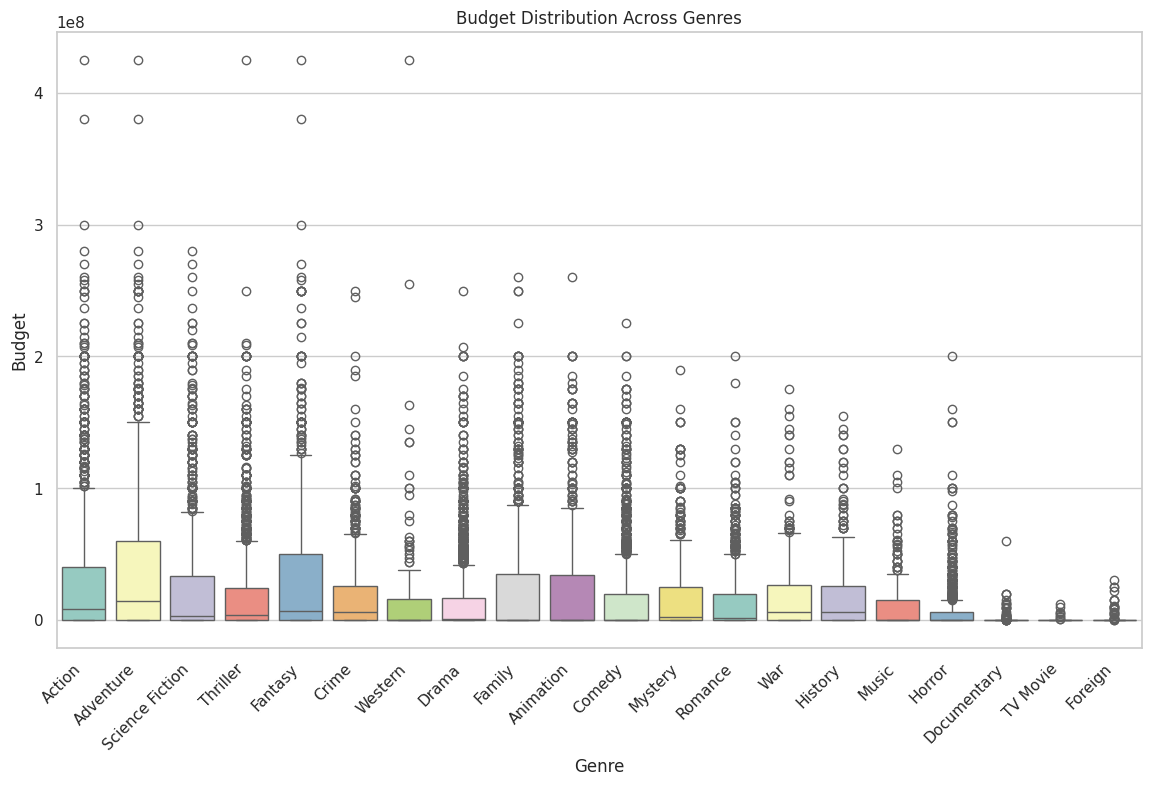

In [13]:
# Convert 'genres' column to strings and split
df['genres'] = df['genres'].apply(lambda x: str(x).split('|'))

# Create a new DataFrame with one row for each genre
df_genres = df.explode('genres')

# Create a box plot to visualize budget distribution across genres
plt.figure(figsize=(14, 8))
sns.boxplot(x=df_genres['genres'], y=df_genres['budget'], palette='Set3')
plt.title('Budget Distribution Across Genres')
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.xticks(rotation=45, ha='right')  # Rotate genre labels for better readability
plt.show()



> The box plot analysis unveils how budgets are distributed across different genres. Action and Adventure genres tend to have higher median budgets, possibly due to the costs associated with special effects and set designs. This information can guide filmmakers and producers in making informed decisions about budget allocation based on genre.



**Conclusion **

In this comprehensive analysis of the TMDB 5000 Movie Dataset, I tried to delved into various aspects of the movie industry to gain valuable insights. The exploration covered seasonal trends in movie releases, budget and popularity thresholds, the impact of crew collaboration on movie success, consistency between ratings and revenue, and the distribution of budgets across different genres.The findings emphasize the multifaceted nature of movie success, driven by a combination of factors including seasonality, collaborative efforts, genre-specific budget considerations, and audience preferences. These insights can inform decision-making processes, guiding professionals in optimizing their strategies for successful and impactful movie productions.